In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import g3py as g3


g3.style_seaborn()
g3.style_widget()

# Data

In [5]:
x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.35)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 108 (34.95145631067961%)


In [6]:
with g3.Model() as model:
    gp = g3.GP(x, g3.Zero(), g3.SE(x), hidden=y)
    gp.describe('Sunspots','YEAR','SUNACTIVITY')
    gp.observed(x_obs,y_obs)
    gp.compile()

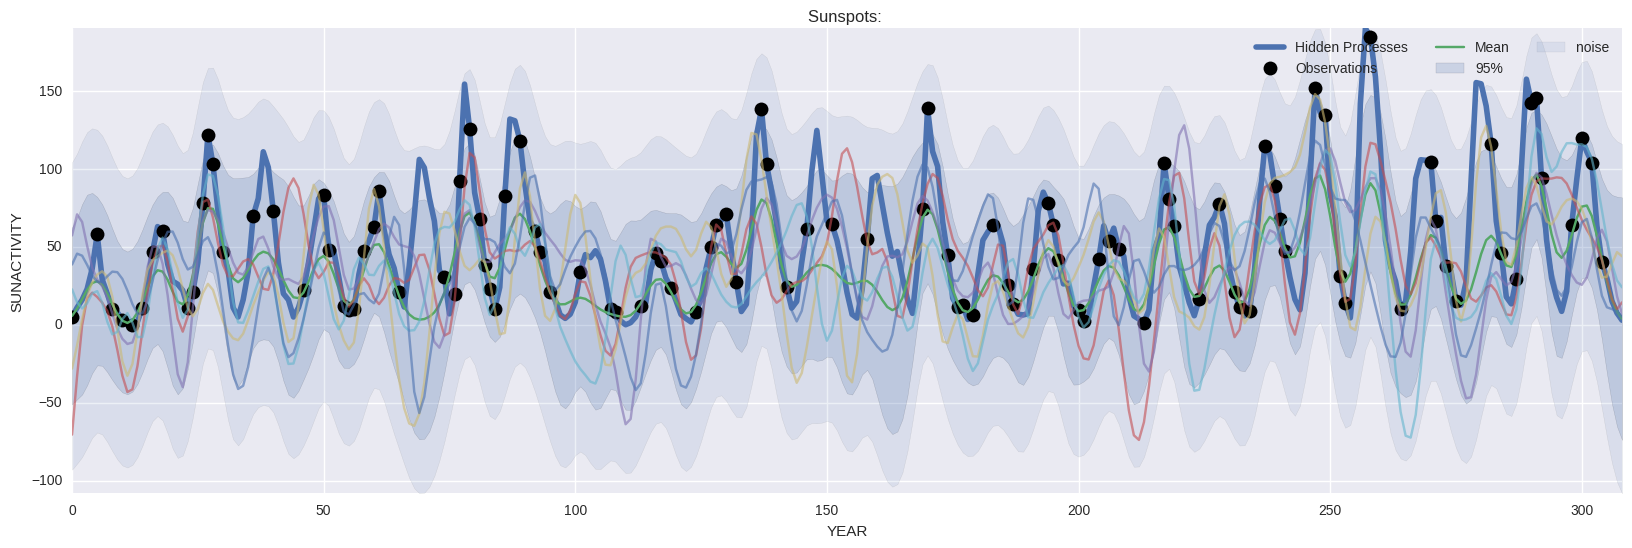

In [7]:
gp.plot_gp(gp.find_default(), samples=5)

In [8]:
gp.widget_params()

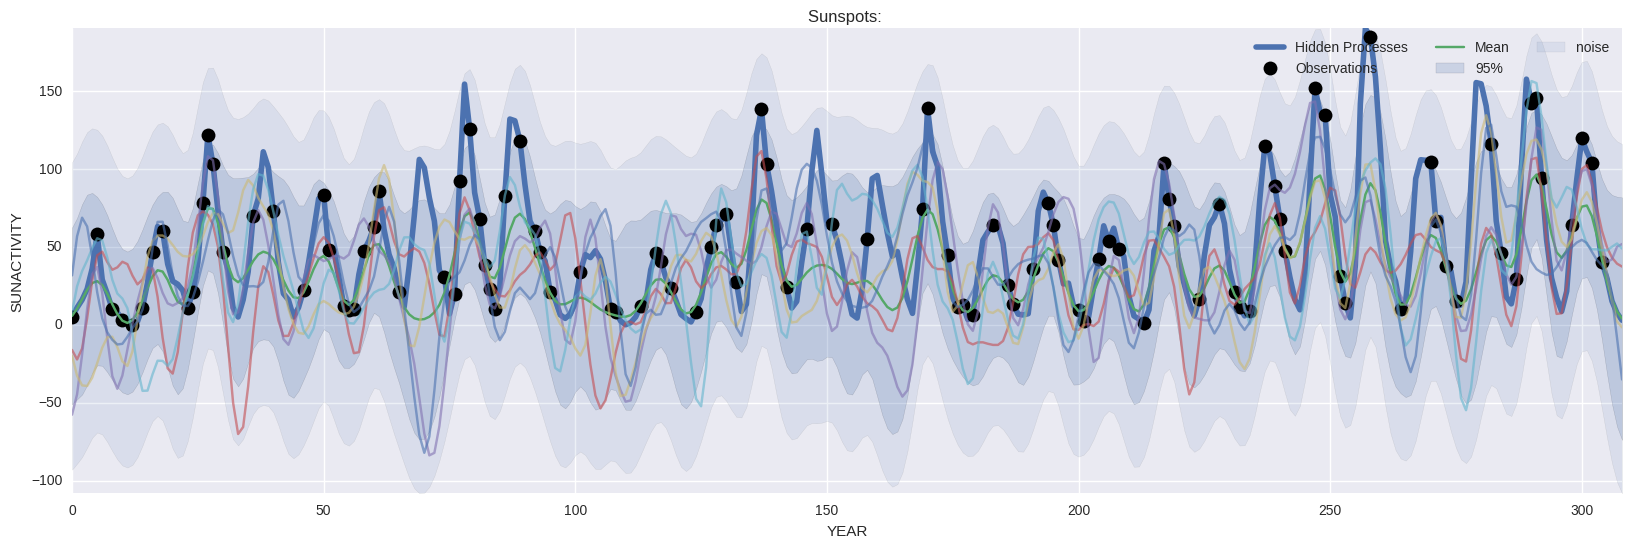

In [9]:
gp.plot_gp(gp.get_params(), samples=5)

Starting function value (-logp): 580.551


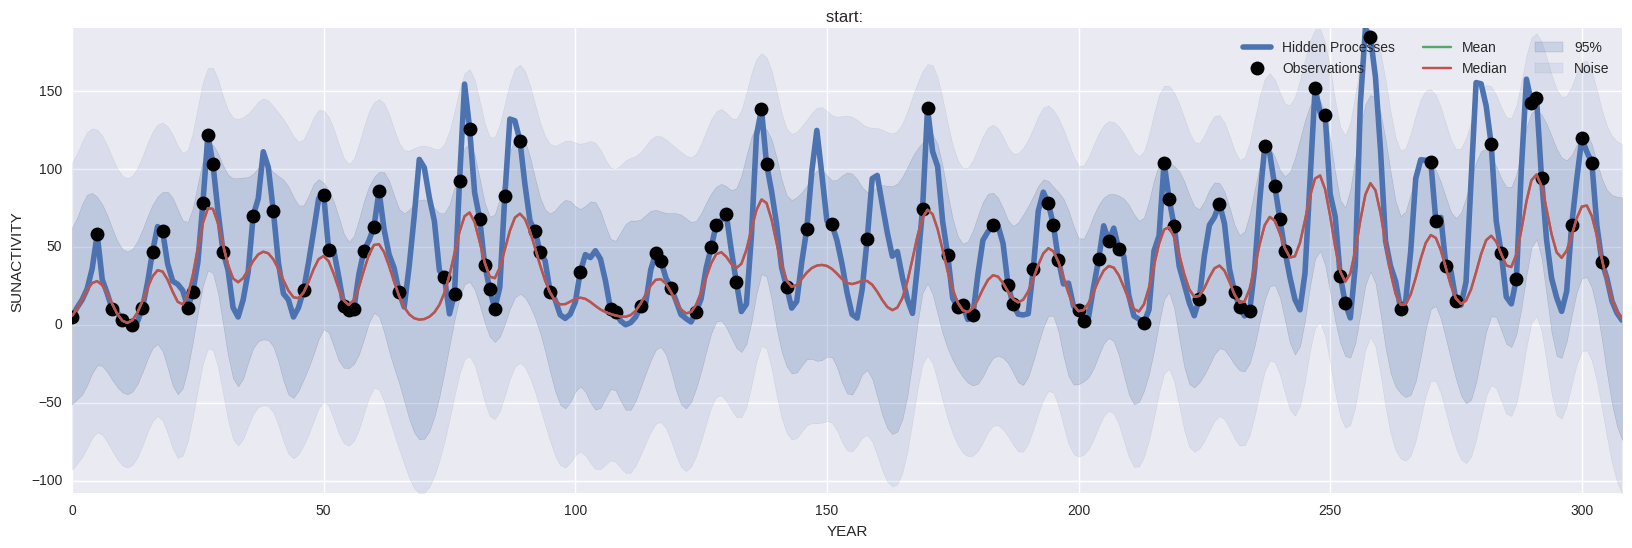

         Current function value: 550.500366
         Iterations: 10
         Function evaluations: 76
         Gradient evaluations: 64


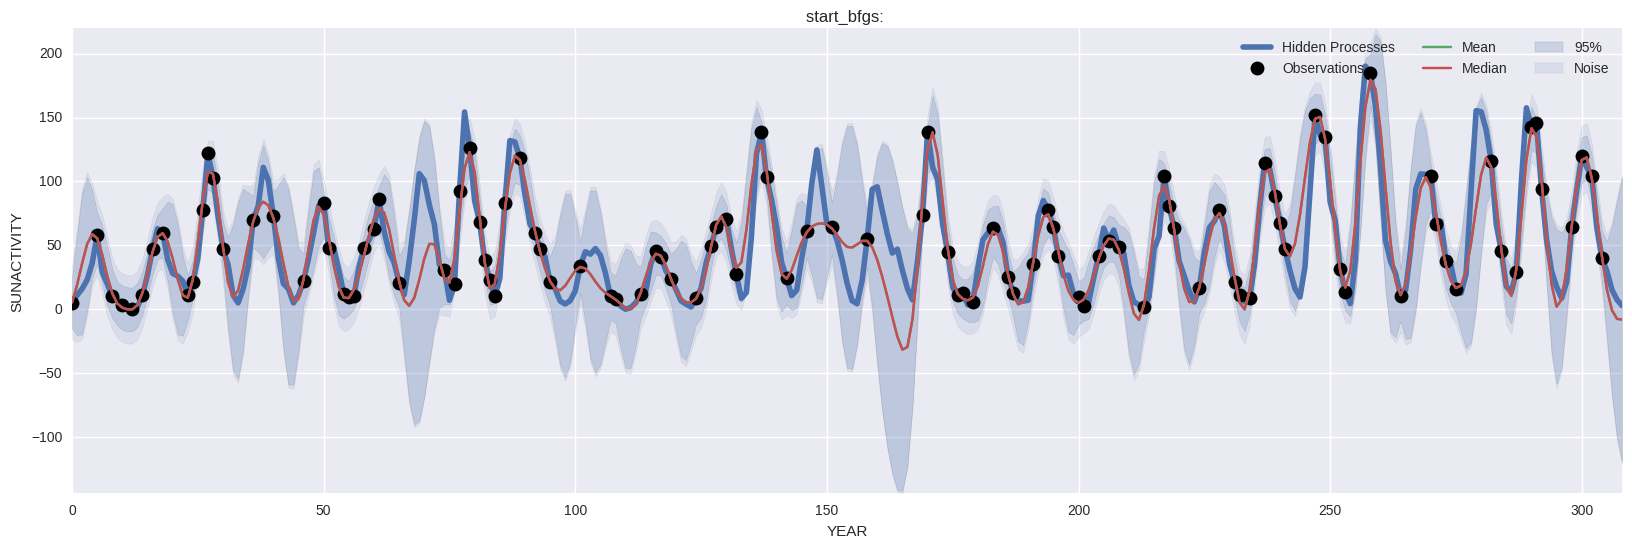

start_powell
Optimization terminated successfully.
         Current function value: 550.500488
         Iterations: 4
         Function evaluations: 181


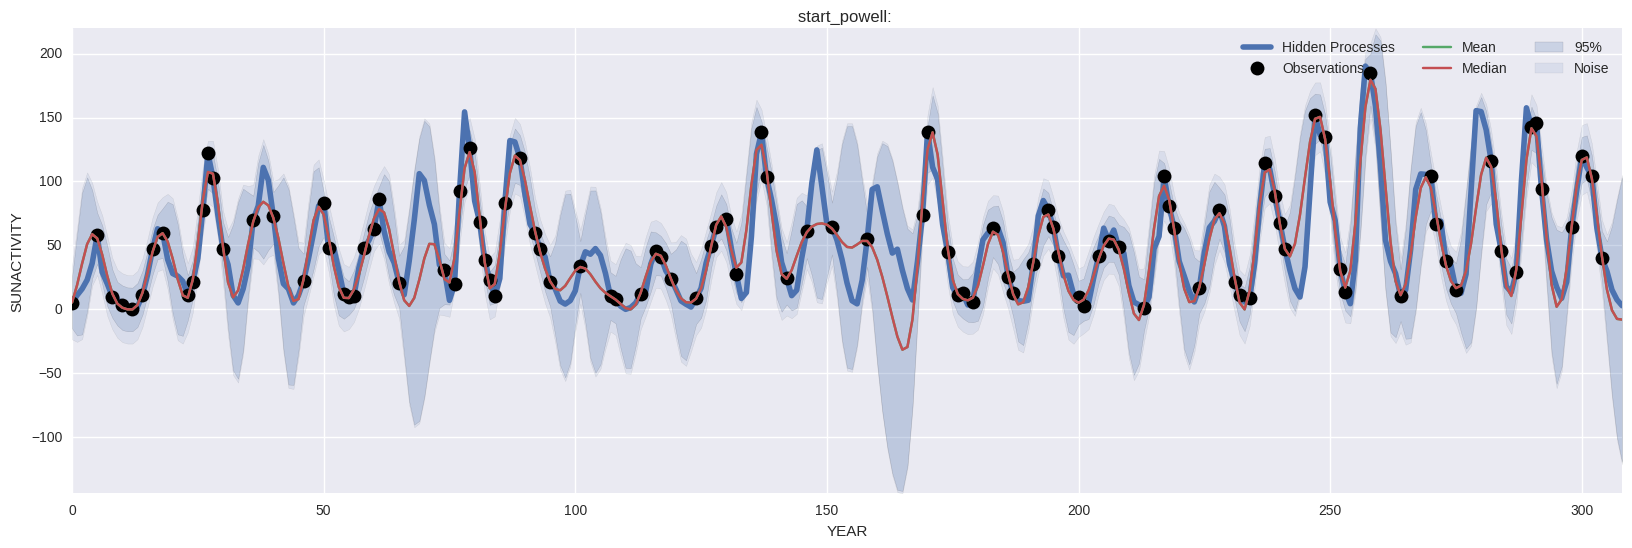

         Current function value: 550.500366
         Iterations: 0
         Function evaluations: 76
         Gradient evaluations: 64


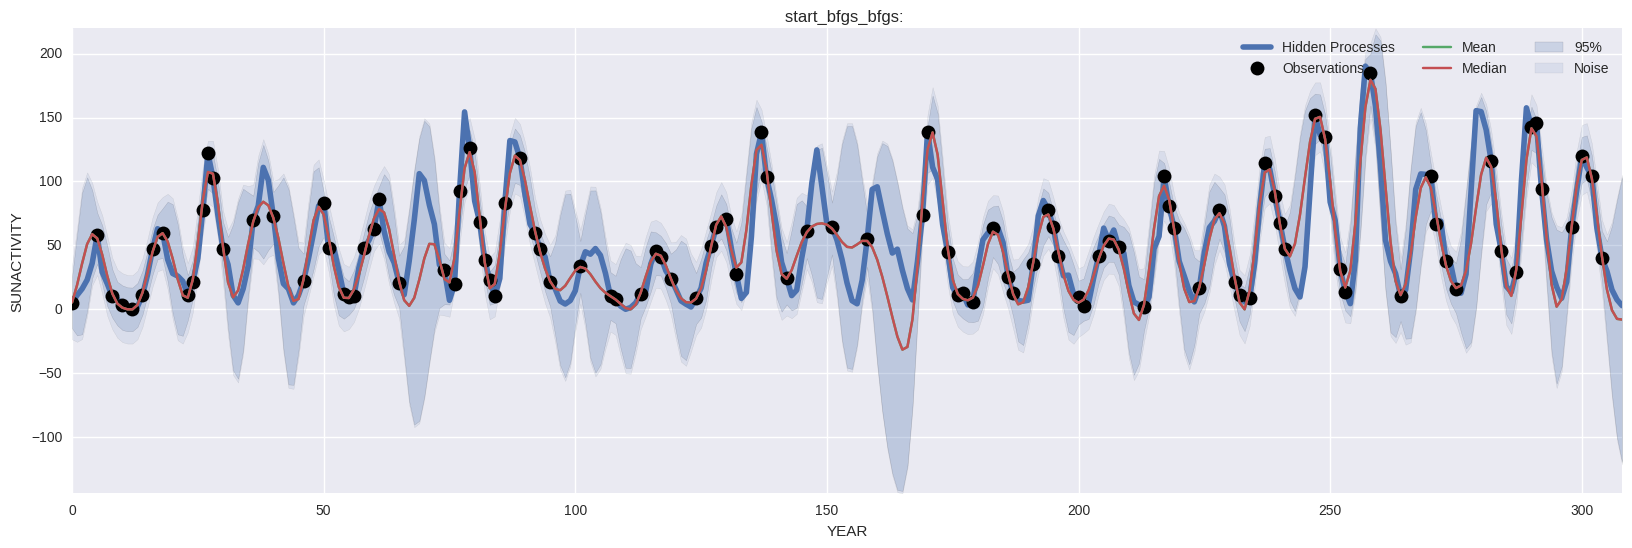

start_bfgs_powell
Optimization terminated successfully.
         Current function value: 550.500366
         Iterations: 1
         Function evaluations: 72


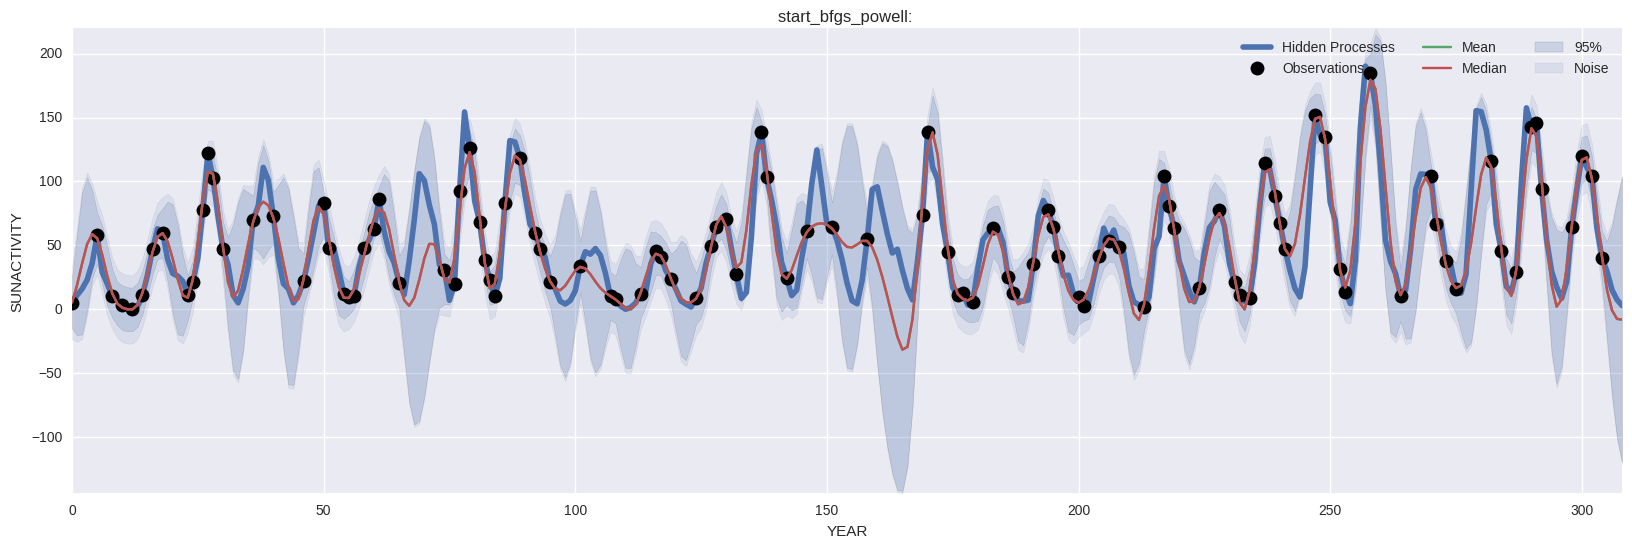

In [10]:
params = gp.find_MAP(start=gp.get_params(), points=4, plot=True)

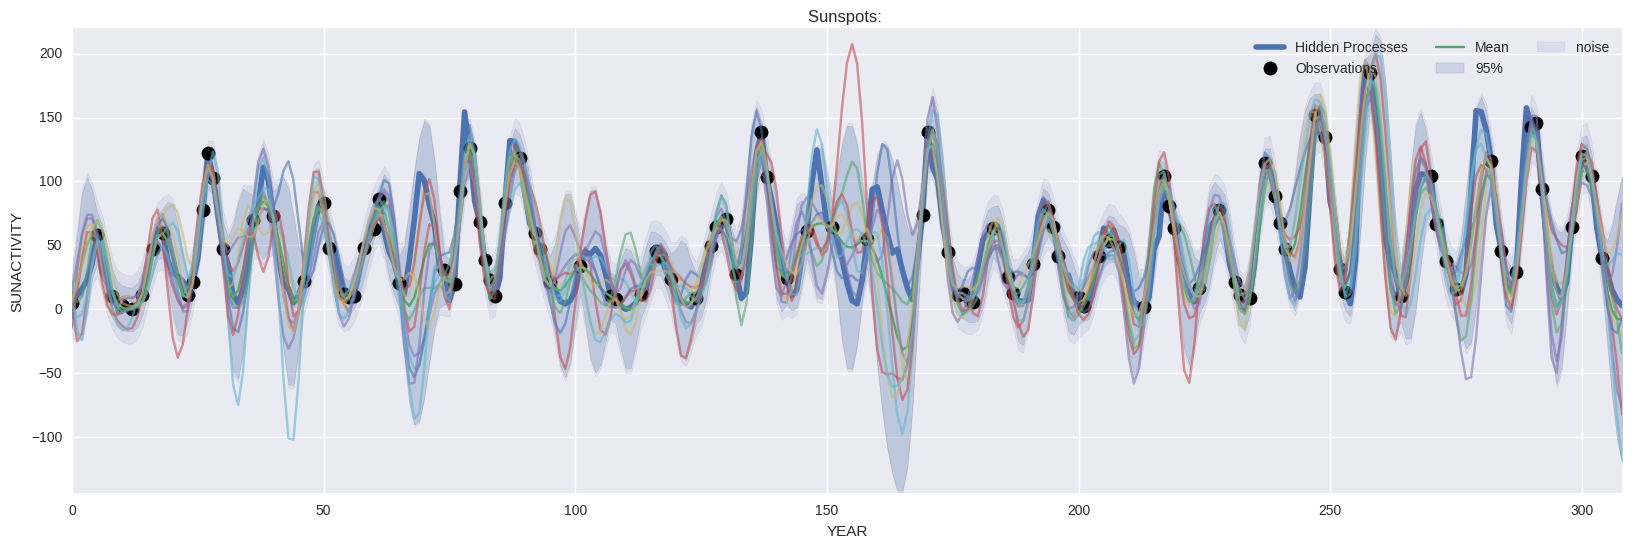

In [11]:
gp.plot_gp(params, samples=10)
g3.save_plot('images/01-Gaussian-Processes.pdf')

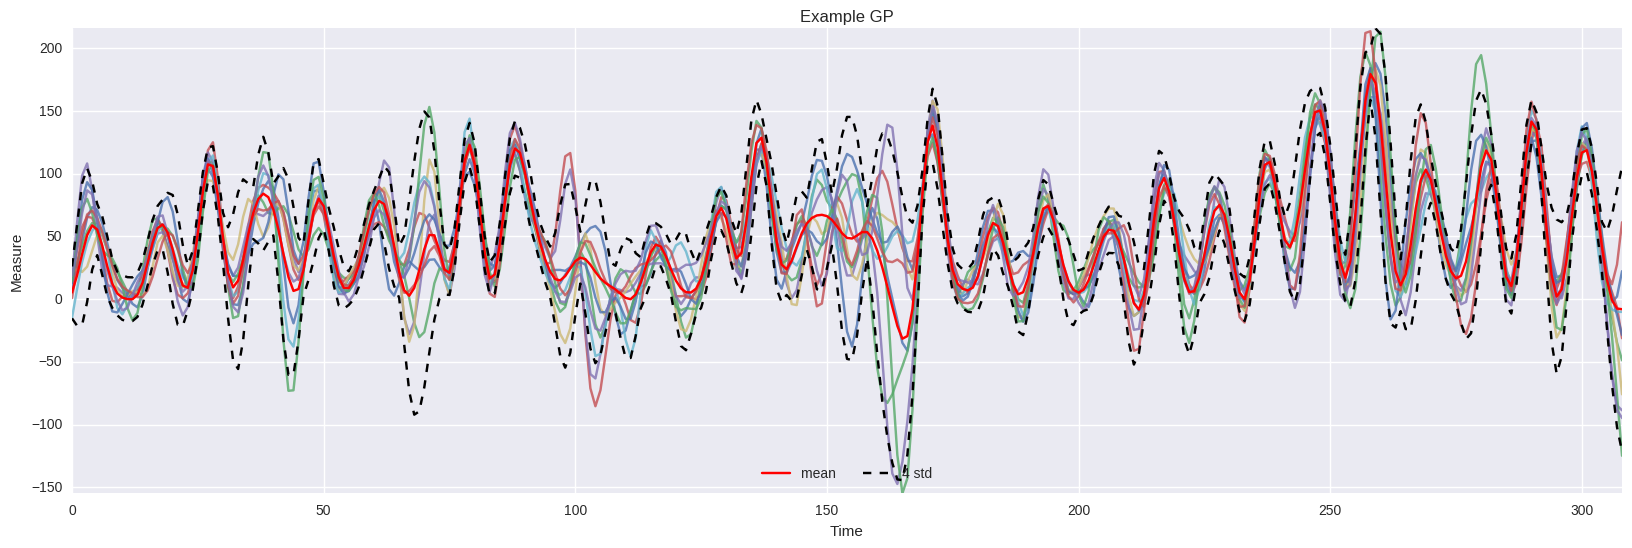

In [12]:
mu, var = gp.predict_gp(params)
samples = gp.sample_gp(params, 10)
g3.plot(samples, alpha=0.8)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*var**0.5, '--k', label='4 std')
g3.plot(mu - 2*var**0.5, '--k')
g3.text_plot('Example GP', 'Time', 'Measure')
g3.save_plot('images/01-Gaussian-Processes-2.pdf')

Download Images
* [01-Gaussian-Processes.pdf](images/01-Gaussian-Processes.pdf)
* [01-Gaussian-Processes-2.pdf](images/01-Gaussian-Processes.pdf)